In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Set locations

In [2]:
DATA_LOCATION = '../data/'
TEST_IMAGES_LOCATION = '../data/test_images/'
TRAIN_IMAGES_LOCATION = '../data/train_images/'

# Import data

### Label mapping

In [3]:
label_map = pd.read_csv(DATA_LOCATION + 'label_map.txt', sep=' ', names=['class_name','class_nr'])

In [4]:
label_map.sample(n=10)

,class_name,class_nr
85,ephyra,85
32,diatom_chain_string,32
78,fish_larvae_myctophids,78
28,tunicate_salp,28
62,appendicularian_fritillaridae,62
110,hydromedusae_sideview_big,110
15,invertebrate_larvae_other_B,15
61,siphonophore_calycophoran_rocketship_young,61
73,siphonophore_calycophoran_sphaeronectes,73
90,trochophore_larvae,90


### Sample data

In [5]:
sample = pd.read_csv(DATA_LOCATION + 'sample.csv', names=['image','class_nr'], header=0)

In [6]:
sample.sample(n=10)

,image,class_nr
1372,58014.jpg,0
5806,48175.jpg,0
2485,94975.jpg,0
1571,155179.jpg,0
4868,114919.jpg,0
5104,16442.jpg,0
6049,51823.jpg,0
2405,6344.jpg,0
4347,90441.jpg,0
4846,92908.jpg,0


### Train data

In [7]:
train_labels = pd.read_csv(DATA_LOCATION + 'train_onelabel.csv')

In [8]:
train_labels.sample(n=10)

,image,class
20961,48861.jpg,103
9202,70047.jpg,42
18170,109126.jpg,84
19520,11150.jpg,99
10563,16245.jpg,48
10972,69796.jpg,50
19854,69503.jpg,100
14349,139015.jpg,67
16592,144761.jpg,81
16303,132843.jpg,80


## The actual images

Show a random image from the training set

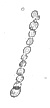

In [12]:
img = TRAIN_IMAGES_LOCATION + train_labels.sample(n=1).iloc[0]['image']
Image(filename=img)